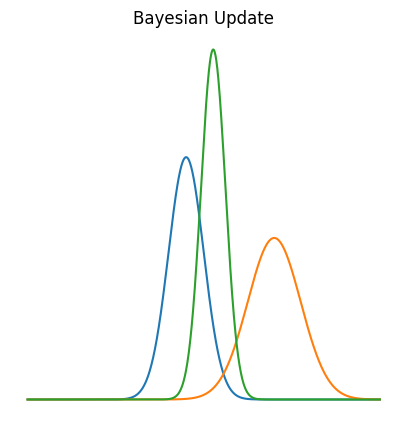

In [23]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

def bayesian_update(mu1, sig1, mu2, sig2):
    mu_new = (sig1**2 * mu2 + sig2**2 * mu1) / (sig1**2 + sig2**2)
    sig_new = 1. / (1./sig1**2 + 1./sig2**2)
    return [mu_new, sig_new]

# prior beliefs
mu1 = -1.0 
sig1 = 1.0

# observed data
mu2 = 4.0
sig2 = 1.5

x = np.linspace(-10, 10, 1000)
prior = gaussian(x, mu1, sig1)
likelihood = gaussian(x, mu2, sig2)

# Perform Bayesian update
mu_new, sig_new = bayesian_update(mu1, sig1, mu2, sig2)
posterior = gaussian(x, mu_new, sig_new)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(x, prior, label='Prior')
plt.plot(x, likelihood, label='Likelihood')
plt.plot(x, posterior, label='Posterior')
plt.axis('off')
plt.title('Bayesian Update')
# plt.legend()
plt.savefig("bayesian_update.png",transparent=True)
